<a href="https://colab.research.google.com/github/manarifz/Data-Science-Bootcamp/blob/main/Project_Final_Review_(Mobile_Price_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study:**
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

#### 1. Business Understanding

- Our problem here is finding the value of the Mobile Price.
- Main Goal: Predict the value of Mobile Price based on single independent variable.
- Main Object: -Building a predictive model, find correlation between features to the selling price

#### 2. Analytic Approach
- In this project the problem is about predicting the Mobile Price.
- By using Simple Linear Regression algorithm to solve the problem.

#### 3. Data Requirements
- Necessary data content, Data Formats, Sources for initial data collection.

- In thin project we need to collect data about the Car Price and all other features related to car.

#### 4. Data Collection
- After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.

#### 5. Data Understanding
- Data understanding encompasses all activities related to constructing the data set.

In [ ]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the dataset
df = pd.read_csv('mobileprice.csv')

#read the first 10 rows of the dataset
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


# **Features of Mobile Price Dataset**

1. battery_power - Total energy a battery can store in one time measured in mAh

2. blue - has bluetooth or not

3. clock_speed - speed at which microprocessor executes instructions

4. dual_sim - has dual sim support or not

5. fc - front camera megapixels

6. four_g - has 4G or not

7. in_memory - internal memory in gigabytes

8. m_dep - mobile depth in cm

9. mobile_wt - weight of mobile phone

10. n_cores - number of cores of processors

11. pc - primary camera mega pixels

12. px_height - pixel resolution height

13. px_width - pixel resolution width

14. ram - random access memory in megabytes

15. sc_h - screen height of mobile in cm

16. sc_w - screen width of mobile in cm

17. talk_time - longest time that a single battery charge will last when you are

18. three_g - has 3G or not

19. touch_screen - has touch screen or not

20. wifi - has wifi or not

21. price_range - this is target variable with value of 0(low cost), 1(medium cost), 2(high cost), and 3(very high cost)

# **Data Wrangling**

In [ ]:
#display all the columns
pd.set_option('display.max_columns', None)

#read first five rows of the dataset
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#identifying number of rows and columns from the dataset
df.shape

(2000, 21)

In [ ]:
#checking background information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#checking for any missing values in the dataset
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#checking for any duplicates
df.duplicated().sum()

0

In [ ]:
#statistical summary of the dataset
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
#Data Binning
bins_price = np.linspace(df['price_range'].min(),df['price_range'].max(), 5)

print(bins_price)

label_names = ['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost']

df['Cost_Binning'] = pd.cut(df['price_range'], bins_price, labels=label_names, include_lowest=True)

df[['price_range', 'Cost_Binning']].head (30)

[0.   0.75 1.5  2.25 3.  ]


,price_range,Cost_Binning
0,1,Medium Cost
1,2,High Cost
2,2,High Cost
3,2,High Cost
4,1,Medium Cost
5,1,Medium Cost
6,3,Very High Cost
7,0,Low Cost
8,0,Low Cost
9,0,Low Cost


In [ ]:
df.sample(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Cost_Binning
1953,727,1,2.5,1,0,1,64,0.2,193,1,9,664,711,3654,9,1,16,1,1,0,3,Very High Cost
1432,630,0,2.0,0,9,1,14,0.5,180,8,13,66,1448,1212,12,8,12,1,0,0,0,Low Cost
765,733,0,2.1,0,5,1,7,0.2,174,7,10,445,1409,1403,15,8,2,1,1,0,0,Low Cost
387,560,0,0.5,0,14,0,23,1.0,146,8,15,356,1903,2360,17,16,18,0,1,1,1,Medium Cost
388,1117,0,0.5,0,1,0,12,0.6,144,7,8,798,817,2895,7,6,16,1,1,0,2,High Cost
970,904,0,1.6,1,5,1,14,0.2,102,8,9,56,760,1846,7,0,3,1,0,1,1,Medium Cost
1683,1083,1,2.0,0,3,0,41,0.7,158,5,5,937,1164,1543,18,3,10,0,0,1,1,Medium Cost
389,1712,0,1.4,0,1,0,63,0.5,137,7,12,747,1126,3652,16,1,19,1,0,0,3,Very High Cost
1535,600,1,1.8,0,9,1,6,0.8,199,2,15,486,1032,3495,17,4,7,1,1,0,2,High Cost
1781,1876,0,1.3,1,9,1,64,1.0,98,3,19,600,1211,3132,17,0,2,1,1,1,3,Very High Cost


In [ ]:
df.dtypes

battery_power       int64
blue                int64
clock_speed       float64
dual_sim            int64
fc                  int64
four_g              int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g             int64
touch_screen        int64
wifi                int64
price_range         int64
Cost_Binning     category
dtype: object

# **Exploratory Data Analysis (EDA)**

In [ ]:
#Finding the correlation features
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [ ]:
df.drop(columns='Cost_Binning', axis=1, inplace=True)

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


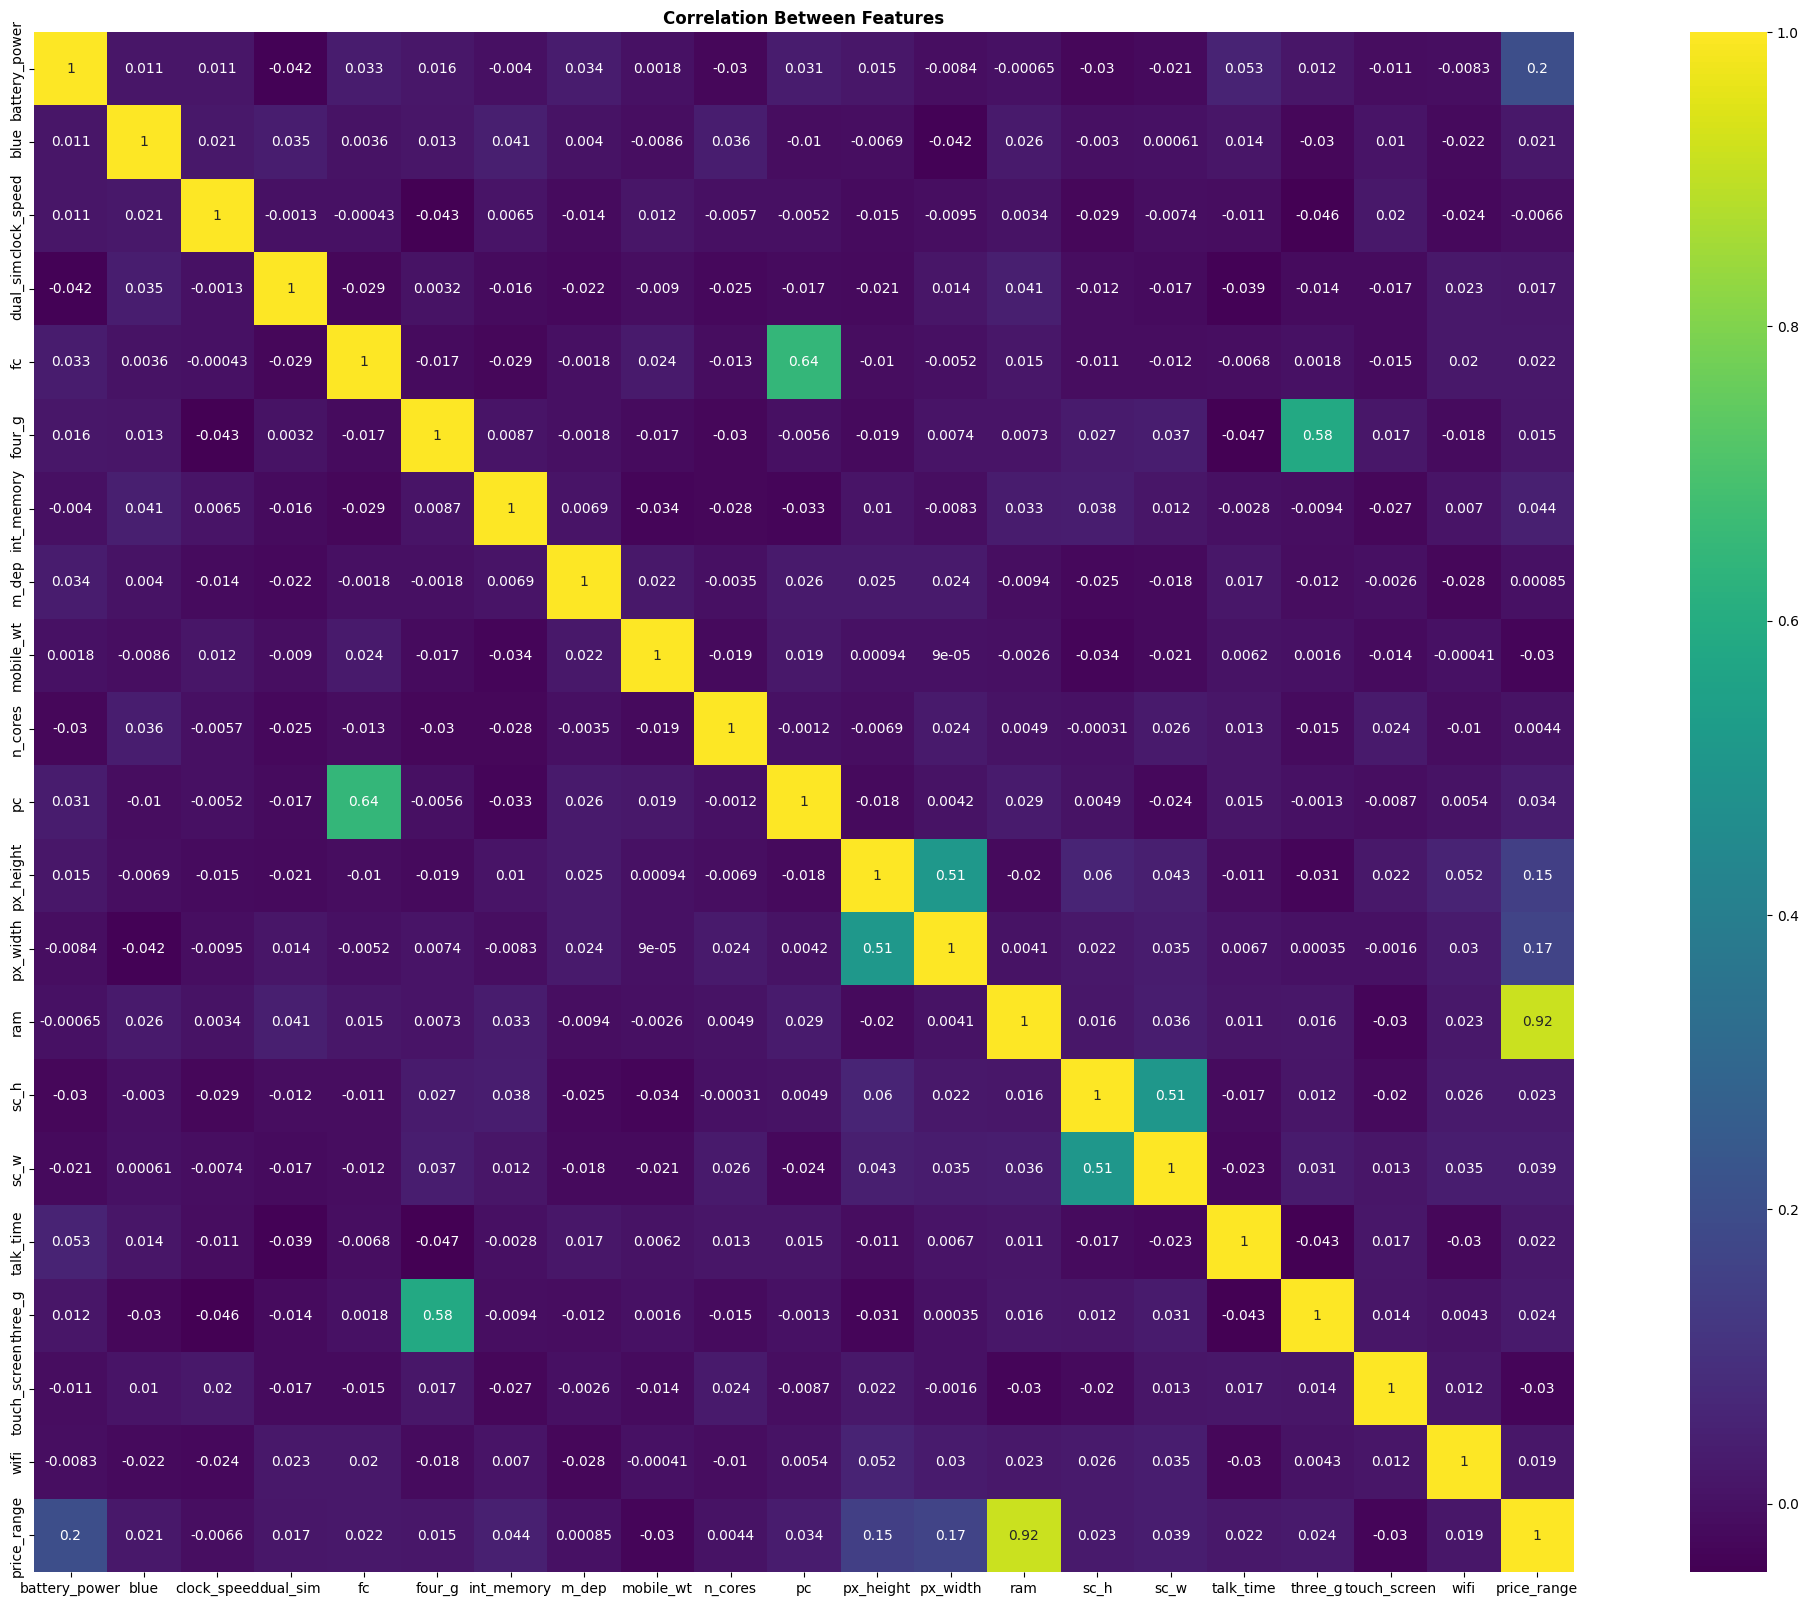

In [ ]:
#heat mapping on correlation matrix
plt.figure(figsize=(30,20))
df_corr = df.corr()
sns.heatmap(df_corr, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation Between Features', fontweight='bold')
plt.show()

In [ ]:
correlation =[]

for i in df.columns:

    cor =df[i].corr(df['price_range'])
    correlation.append(abs(cor))

In [ ]:
feature = pd.DataFrame({'Feature':df.columns, 'Correlation':correlation})
df2 = pd.DataFrame(feature)
df2

,Feature,Correlation
0,battery_power,0.200723
1,blue,0.020573
2,clock_speed,0.006606
3,dual_sim,0.017444
4,fc,0.021998
5,four_g,0.014772
6,int_memory,0.044435
7,m_dep,0.000853
8,mobile_wt,0.030302
9,n_cores,0.004399


In [ ]:
#drop price range from the dataframe df2
df2.drop(20, inplace=True)

In [ ]:
#sort features correlation in ascending order
df2.sort_values(by='Correlation')

,Feature,Correlation
7,m_dep,0.000853
9,n_cores,0.004399
2,clock_speed,0.006606
5,four_g,0.014772
3,dual_sim,0.017444
19,wifi,0.018785
1,blue,0.020573
16,talk_time,0.021859
4,fc,0.021998
14,sc_h,0.022986


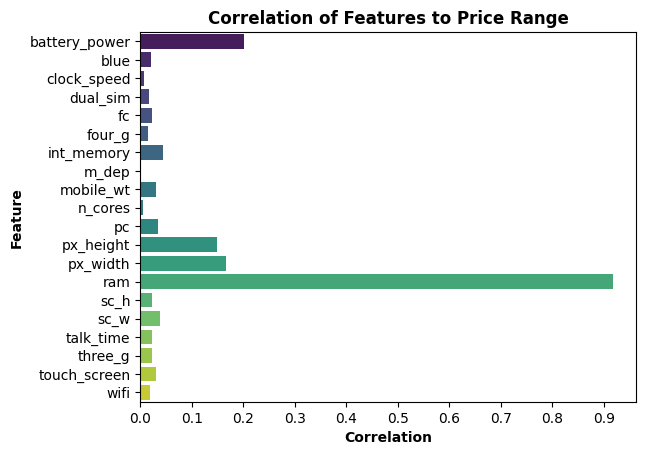

In [ ]:
#visualizing correlation features to price range using bar plotting
sns.barplot(y ='Feature' , x ='Correlation' ,data =df2, palette='viridis')
plt.xticks(np.arange(0 ,1 ,0.1))
plt.xlabel('Correlation', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Correlation of Features to Price Range', fontweight='bold')
plt.show()

### **Based on the figure heatmaps and barplots correlation, the batter power, ram, px_height, px_width have strong correlation with the price range**

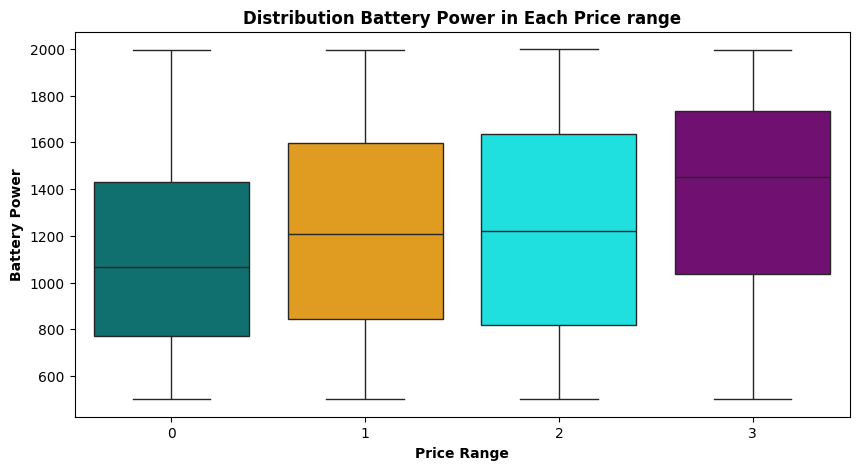

In [ ]:
#box plotting battery power to each price range
plt.figure(figsize=(10,5))
plt.title('Distribution Battery Power in Each Price range', fontweight='bold')
sns.boxplot(x=df['price_range'],y=df['battery_power'], palette=['teal', 'orange', 'cyan','purple'])
plt.xlabel('Price Range', fontweight='bold')
plt.ylabel('Battery Power', fontweight='bold')
plt.show()

In [ ]:
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots

In [ ]:
df_battery_price = df.groupby('price_range')['battery_power'].mean()

In [ ]:
# set parameter for plot figures
fig = px.line(df_battery_price,
              labels={'value':'Mean of Battery Capacity','price_range':'Price Range'},
              color_discrete_sequence=['red'],
              )
#adjusting font weight for x and y axis labels
fig.update_layout(font=dict(size=16))

#visualise the plot
fig.show()

### **The figures showed that the price range of mobile phone increases as the battery capacity increases.**

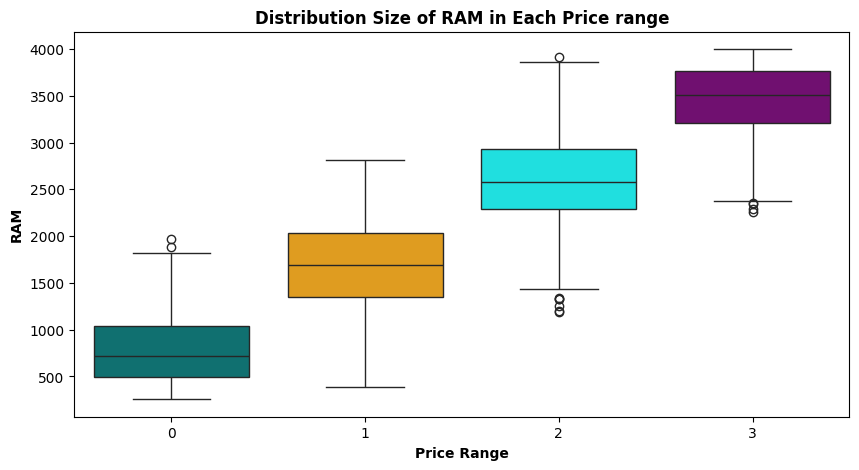

In [ ]:
#box plotting size of RAM to each price range
plt.figure(figsize=(10,5))
plt.title('Distribution Size of RAM in Each Price range', fontweight='bold')
sns.boxplot(x=df['price_range'],y=df['ram'], palette=['teal', 'orange', 'cyan','purple'])
plt.xlabel('Price Range', fontweight='bold')
plt.ylabel('RAM', fontweight='bold')
plt.show()

In [ ]:
df_size_ram = df.groupby('price_range')['ram'].mean()

In [ ]:
# set parameter for plot figures
fig1 = px.line(df_size_ram,
              labels={'value':'Mean of RAM Size','price_range':'Price Range'},
              color_discrete_sequence=['red'],
              )
#adjusting font weight for x and y axis labels
fig1.update_layout(font=dict(size=16))

#visualise the plot
fig1.show()

### **The cost of the price range increases as the size of the RAM increases.**

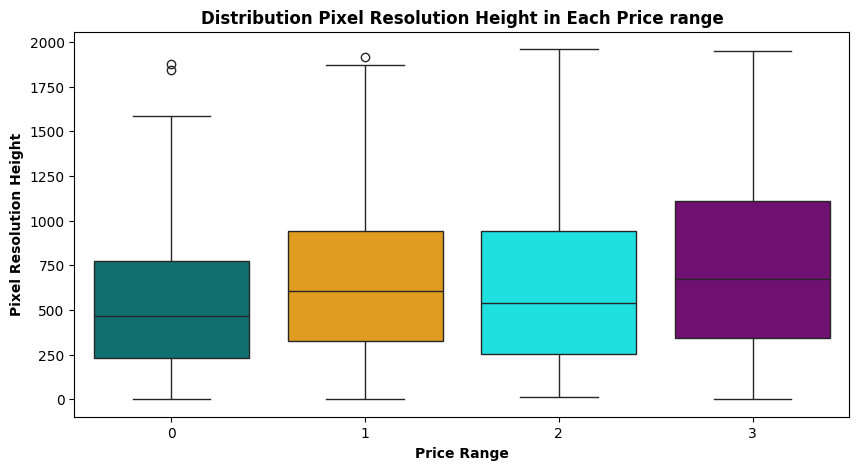

In [ ]:
#box plotting size of RAM to each price range
plt.figure(figsize=(10,5))
plt.title('Distribution Pixel Resolution Height in Each Price range', fontweight='bold')
sns.boxplot(x=df['price_range'],y=df['px_height'], palette=['teal', 'orange', 'cyan','purple'])
plt.xlabel('Price Range', fontweight='bold')
plt.ylabel('Pixel Resolution Height', fontweight='bold')
plt.show()

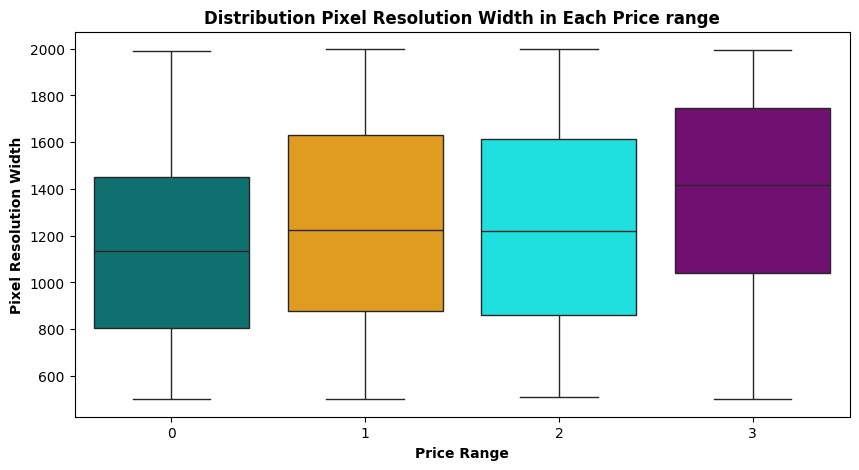

In [ ]:
#box plotting size of RAM to each price range
plt.figure(figsize=(10,5))
plt.title('Distribution Pixel Resolution Width in Each Price range', fontweight='bold')
sns.boxplot(x=df['price_range'],y=df['px_width'], palette=['teal', 'orange', 'cyan','purple'])
plt.xlabel('Price Range', fontweight='bold')
plt.ylabel('Pixel Resolution Width', fontweight='bold')
plt.show()

In [ ]:
# Assuming df_wifi is your DataFrame after value counts
df_wifi = df['wifi'].value_counts()

# Define your color palette
color_palette = ['teal', 'orange']

# Create the pie chart with color variation
fig = px.pie(values=df_wifi,
             names=['Support Wifi', 'Does Not Support Wifi'],
             template='ggplot2',
             title='Wifi Support',
             color_discrete_sequence=color_palette)

# Update text information for the chart
fig.update_traces(textinfo='label+percent')

# Display the plot
fig.show()

In [ ]:
# Assuming df_bluetooth is your DataFrame after value counts
df_bluetooth = df['blue'].value_counts()

# Define your color palette
color_palette = ['teal', 'orange']

# Create the pie chart with color variation
fig = px.pie(values=df_bluetooth,
             names=['Support Bluetooth', 'Does Not Support Bluetooth'],
             template='ggplot2',
             title='Bluetooth Support',
             color_discrete_sequence=color_palette)

# Update text information for the chart
fig.update_traces(textinfo='label+percent')

# Display the plot
fig.show()

In [ ]:
# Assuming df_bluetooth is your DataFrame after value counts
df_4g = df['four_g'].value_counts()

# Define your color palette
color_palette = ['teal', 'orange']

# Create the pie chart with color variation
fig = px.pie(values=df_4g,
             names=['Support 4G', 'Does Not Support 4G'],
             template='ggplot2',
             title='4G Support',
             color_discrete_sequence=color_palette)

# Update text information for the chart
fig.update_traces(textinfo='label+percent')

# Display the plot
fig.show()

# **Data Preprocessing**

In [ ]:
X = df.drop(columns='price_range')
y = df.price_range

In [ ]:
#normalization features using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

# **Train and Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

#splitting 80(training):20(testing)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 20)
(400, 20)
(1600,)
(400,)


# **Modelling**

# **Choosing Best Parameters for Each Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'decision_tree':{
        'model' : DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy'],
            'max_depth':[None, 5, 10, 15],
            'min_samples_split':[2, 5, 10],
            'min_samples_leaf':[1,2,4]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[0.1, 1, 10, 100],
            'penalty':['l1','l2']
        }
    },
    'svm':{
        'model' : SVC(gamma='auto'),
        'params':{
            'C':[0.1, 1, 10, 20],
            'gamma':[1, 0.1, 0.01, 0.001],
            'kernel':['rbf','linear', 'poly', 'sigmoid']
        }
    }
}

In [ ]:
scores = []

for model_name , mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
            'model':model_name,
            'best_scores':clf.best_score_,
            'best_params':clf.best_params_
        }
    )
pd.DataFrame(scores,columns=['model','best_scores','best_params'])

,model,best_scores,best_params
0,decision_tree,0.856875,"{'criterion': 'entropy', 'max_depth': None, 'm..."
1,random_forest,0.877500,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
2,logistic_regression,0.959375,"{'C': 100, 'penalty': 'l2'}"
3,svm,0.951875,"{'C': 20, 'gamma': 1, 'kernel': 'linear'}"


# **1. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=4, min_samples_split=2, random_state=42)

#machine learning the data
tree.fit(X_train, y_train)

#machine predicting the data
pred_tree = tree.predict(X_test)

#print the model accuracy
print ('The Accuracy of the Decision Tree is:', (metrics.accuracy_score(y_test, pred_tree)*100))

The Accuracy of the Decision Tree is: 85.5


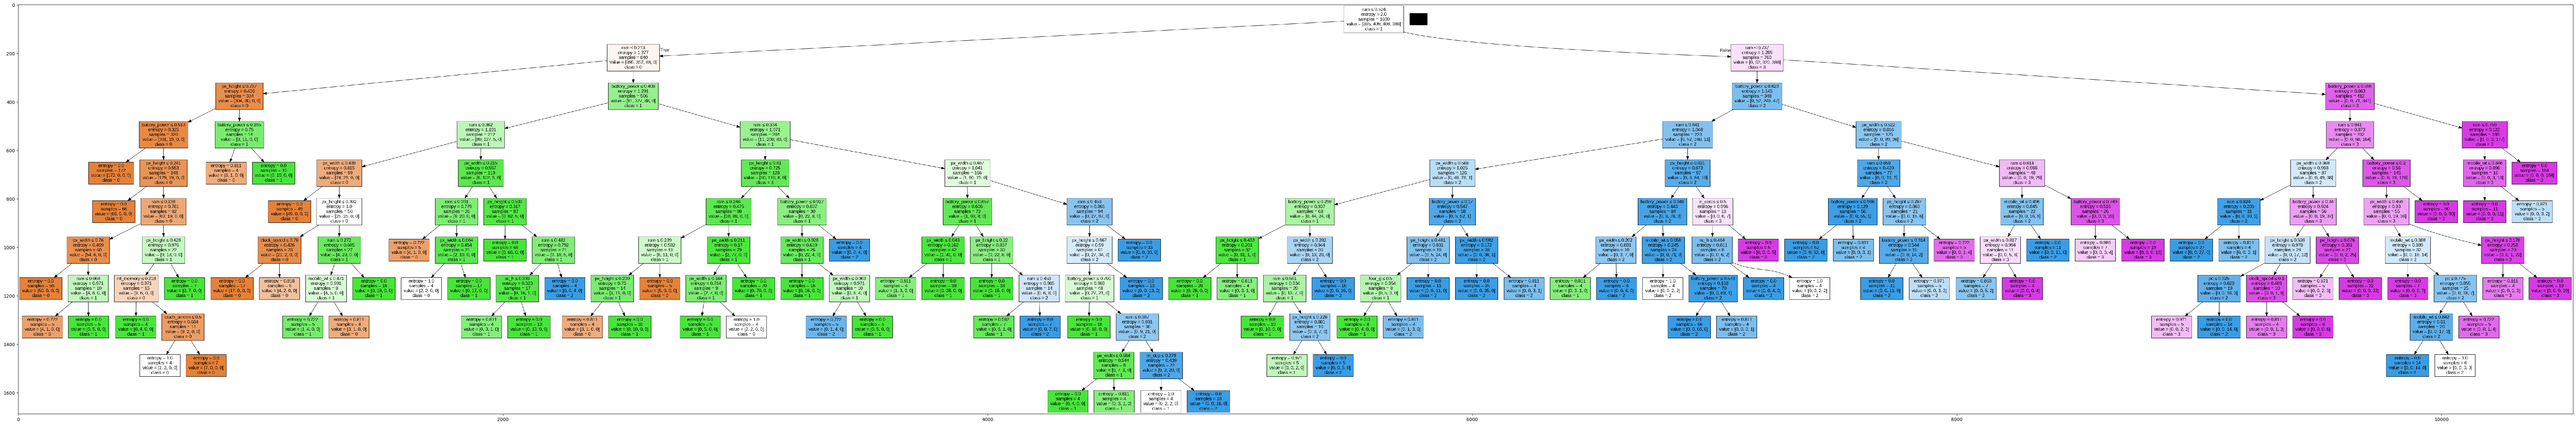

In [ ]:
import matplotlib.pyplot as plt
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn.tree import export_graphviz
import numpy as np
%matplotlib inline

# Assuming df2 is your DataFrame and ClassTree is your trained decision tree model
dot_data = StringIO()
filename = "pred_tree.png"
feature_names = df.columns[:20]  # Adjust the number of columns accordingly
class_names = np.unique(y_train).astype(str)

# Use export_graphviz from sklearn.tree instead of tree.export_graphviz
out = export_graphviz(tree, feature_names=feature_names, out_file=dot_data,
                      class_names=class_names, filled=True, special_characters=True, rotate=False)

# Create the graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Write the graph to a PNG file
graph.write_png(filename)

# Display the image using matplotlib
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))  # Adjust the figure size as needed
plt.imshow(img, interpolation='nearest')
plt.show()

# **2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',n_estimators=300, max_depth=10, min_samples_leaf=2, min_samples_split=2, random_state=42)

#machine learning the data
forest.fit(X_train, y_train)

#machine predicting the data
pred_forest = forest.predict(X_test)

#print the model accuracy
print ('The Accuracy of the Random Forest is:', (metrics.accuracy_score(y_test, pred_forest)*100))

The Accuracy of the Random Forest is: 90.0


# **3. Logistic Regression**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=100, penalty='l2', random_state=42)

#machine learning the data
log.fit(X_train, y_train)

#machine predicting the data
pred_log = log.predict(X_test)

#print the model accuracy
print ('The Accuracy of the Logistic Regression is:', (metrics.accuracy_score(y_test, pred_log)*100))

The Accuracy of the Logistic Regression is: 97.0


# **4. Support Vector Machine (SVM)**

In [ ]:
svc = SVC(C=20, gamma=1, kernel='linear')
#learning
svc.fit(X_train, y_train)
#Predicting
pred_linear = svc.predict(X_test)

print ('The Accuracy is:', (metrics.accuracy_score(y_test, pred_linear))*100)

The Accuracy is: 96.75


# **Evaluation**

# **1. Confusion Matrix**

In [ ]:
#confusion matrix analysis
from sklearn.metrics import confusion_matrix

#confusion matrix for logistic regression
cmtree = confusion_matrix(y_test, pred_tree, labels=[0,1,2,3])
cmforest = confusion_matrix(y_test, pred_forest, labels=[0,1,2,3])
cmlog = confusion_matrix(y_test, pred_log, labels=[0,1,2,3])
cmsvm = confusion_matrix(y_test, pred_linear, labels=[0,1,2,3])

#print confusion matrix for all the models
print('Confusion Matrix for Decision Tree Classifier:')
print (cmtree)
print('')
print('Confusion Matrix for Random Forest Classifier:')
print (cmforest)
print('')
print('Confusion Matrix for Logistic Regression:')
print(cmlog)
print('')
print('Confusion Matrix for Support Vector Machine:')
print(cmsvm)

Confusion Matrix for Decision Tree Classifier:
[[93 12  0  0]
 [ 6 80  5  0]
 [ 0 11 72  9]
 [ 0  0 15 97]]

Confusion Matrix for Random Forest Classifier:
[[100   5   0   0]
 [  5  78   8   0]
 [  0   7  80   5]
 [  0   0  10 102]]

Confusion Matrix for Logistic Regression:
[[100   5   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   2 110]]

Confusion Matrix for Support Vector Machine:
[[ 99   6   0   0]
 [  0  91   0   0]
 [  0   3  87   2]
 [  0   0   2 110]]


Confusion Matrix for Decision Tree Classifier


<Axes: title={'center': 'Confusion Matrix for Decision Tree Classifier'}>

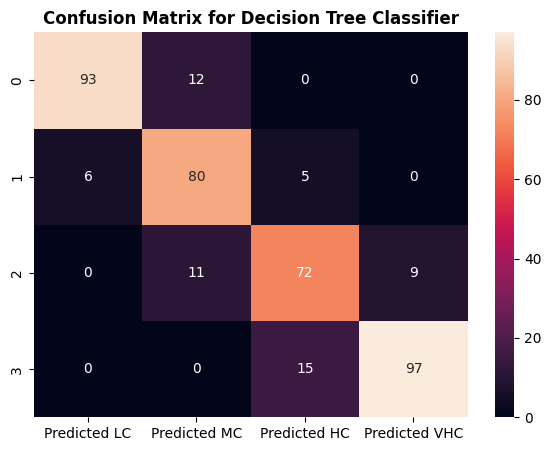

In [ ]:
#visualising the confusion matrix for Decision Tree
from sklearn import metrics

print('Confusion Matrix for Decision Tree Classifier')

#cm = confusion_matrix(y_test, yhat, labels=[1,0])

df_cm=pd.DataFrame(cmtree,index=[i for i in [0,1,2,3]], columns=[i for i in ['Predicted LC', 'Predicted MC','Predicted HC','Predicted VHC']])

plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for Decision Tree Classifier', fontweight='bold')
sns.heatmap(df_cm, annot=True, fmt='d')

Confusion Matrix for Decision Tree Classifier


<Axes: title={'center': 'Confusion Matrix for Random Forest Classifier'}>

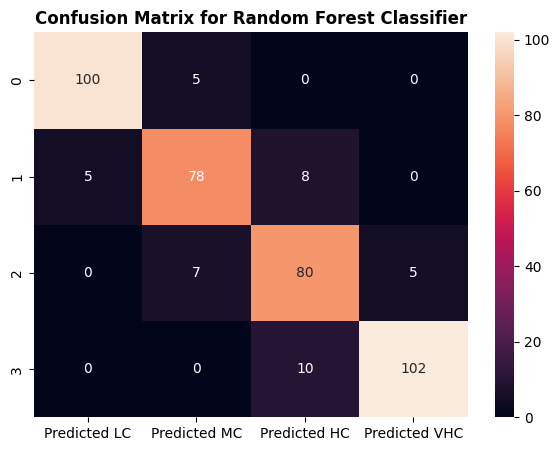

In [ ]:
#visualising the confusion matrix for Random Forest
from sklearn import metrics

print('Confusion Matrix for Decision Tree Classifier')

#cm = confusion_matrix(y_test, yhat, labels=[1,0])

df_cm1=pd.DataFrame(cmforest,index=[i for i in [0,1,2,3]], columns=[i for i in ['Predicted LC', 'Predicted MC','Predicted HC','Predicted VHC']])

plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for Random Forest Classifier', fontweight='bold')
sns.heatmap(df_cm1, annot=True, fmt='d')

Confusion Matrix for Decision Tree Classifier


<Axes: title={'center': 'Confusion Matrix for Logistic Regression'}>

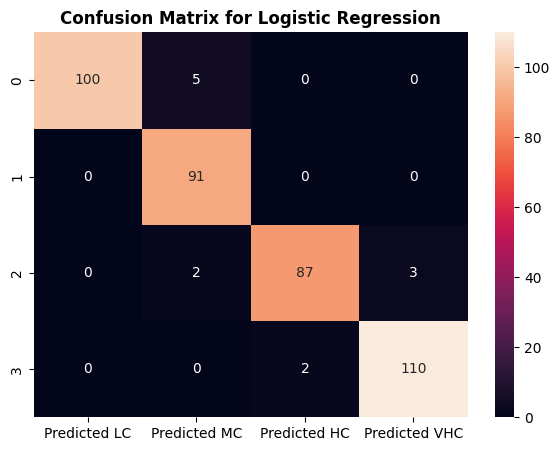

In [ ]:
#visualising the confusion matrix for Random Forest
from sklearn import metrics

print('Confusion Matrix for Decision Tree Classifier')

#cm = confusion_matrix(y_test, yhat, labels=[1,0])

df_cm2=pd.DataFrame(cmlog,index=[i for i in [0,1,2,3]], columns=[i for i in ['Predicted LC', 'Predicted MC','Predicted HC','Predicted VHC']])

plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for Logistic Regression', fontweight='bold')
sns.heatmap(df_cm2, annot=True, fmt='d')

Confusion Matrix for Decision Tree Classifier


<Axes: title={'center': 'Confusion Matrix for Support Vector Machine'}>

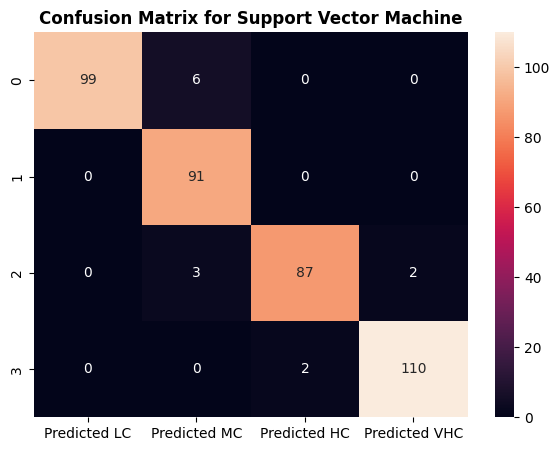

In [ ]:
#visualising the confusion matrix for Random Forest
from sklearn import metrics

print('Confusion Matrix for Decision Tree Classifier')

#cm = confusion_matrix(y_test, yhat, labels=[1,0])

df_cm3=pd.DataFrame(cmsvm,index=[i for i in [0,1,2,3]], columns=[i for i in ['Predicted LC', 'Predicted MC','Predicted HC','Predicted VHC']])

plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for Support Vector Machine', fontweight='bold')
sns.heatmap(df_cm3, annot=True, fmt='d')

# **2. F1 Score**

In [ ]:
from sklearn.metrics import f1_score
# Printing F1 scores for each model
f1_tree = f1_score(y_test, pred_tree, average='micro')*100
f1_forest = f1_score(y_test, pred_forest, average='micro')*100
f1_log = f1_score(y_test, pred_log, average='micro')*100
f1_svm = f1_score(y_test, pred_linear, average='micro')*100

print('The f1 score for the Decision Tree Classifier is:', f1_tree)
print('The f1 score for the Random Forest Classifier is:', f1_forest)
print('The f1 score for the Logistic Regression is:', f1_log)
print('The f1 score for the Support Vector Machine is:', f1_svm)

The f1 score for the Decision Tree Classifier is: 85.5
The f1 score for the Random Forest Classifier is: 90.0
The f1 score for the Logistic Regression is: 97.0
The f1 score for the Support Vector Machine is: 96.75


In [ ]:
dt_accuracy = metrics.accuracy_score(y_test, pred_tree) * 100
rf_accuracy = metrics.accuracy_score(y_test, pred_forest) * 100
lr_accuracy = metrics.accuracy_score(y_test, pred_log) * 100
svm_accuracy = metrics.accuracy_score(y_test, pred_linear) * 100

# Create DataFrame objects to store accuracy scores
accuracy_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM'],
    'Accuracy (%)': [dt_accuracy, rf_accuracy, lr_accuracy, svm_accuracy]
})

print(accuracy_df)

                 Model  Accuracy (%)
0        Decision Tree         85.50
1        Random Forest         90.00
2  Logistic Regression         97.00
3                  SVM         96.75


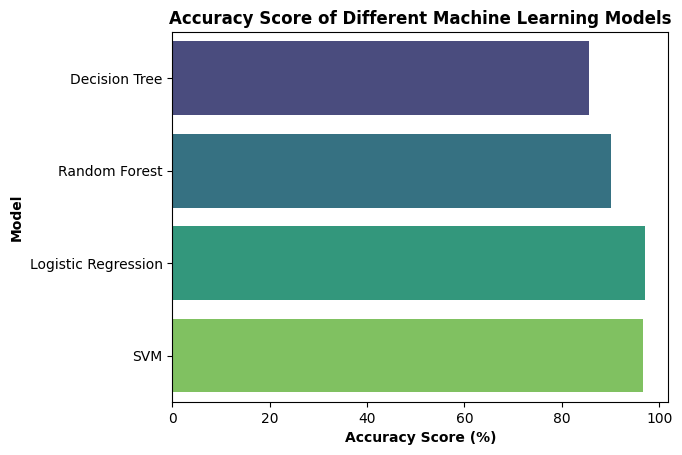

In [ ]:
sns.barplot(x='Accuracy (%)', y='Model', data=accuracy_df, palette='viridis')
plt.title('Accuracy Score of Different Machine Learning Models', fontweight='bold')
plt.xlabel('Accuracy Score (%)', fontweight='bold')
plt.ylabel('Model', fontweight='bold')
plt.show()

In [ ]:
# Create DataFrame for F1 accuracy scores
accuracy_f1 = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM'],
    'F1 Accuracy (%)': [f1_tree, f1_forest, f1_log, f1_svm]
})

print(accuracy_f1)

                 Model  F1 Accuracy (%)
0        Decision Tree            85.50
1        Random Forest            90.00
2  Logistic Regression            97.00
3                  SVM            96.75


In [ ]:
accuracy_f1.head()

,Model,F1 Accuracy (%)
0,Decision Tree,85.50
1,Random Forest,90.00
2,Logistic Regression,97.00
3,SVM,96.75


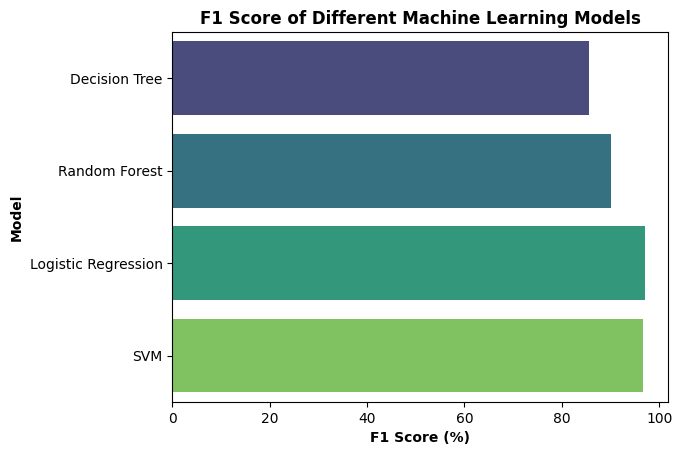

In [ ]:
# Assuming accuracy_f1 DataFrame contains 'Model' and 'F1 Score' columns
sns.barplot(x='F1 Accuracy (%)', y='Model', data=accuracy_f1, palette='viridis')
plt.title('F1 Score of Different Machine Learning Models', fontweight='bold')
plt.xlabel('F1 Score (%)', fontweight='bold')
plt.ylabel('Model', fontweight='bold')
plt.show()

# **3. Classification Report**

In [ ]:
from sklearn.metrics import classification_report

# Get classification reports
report_tree = classification_report(y_test, pred_tree, output_dict=True)
report_forest = classification_report(y_test, pred_forest, output_dict=True)
report_log = classification_report(y_test, pred_log, output_dict=True)
report_svm = classification_report(y_test, pred_linear, output_dict=True)

# Convert to dataframes
df_tree = pd.DataFrame(report_tree).transpose()
df_forest = pd.DataFrame(report_forest).transpose()
df_log = pd.DataFrame(report_log).transpose()
df_svm = pd.DataFrame(report_svm).transpose()

In [ ]:
df_tree

,precision,recall,f1-score,support
0,0.939394,0.885714,0.911765,105.000
1,0.776699,0.879121,0.824742,91.000
2,0.782609,0.782609,0.782609,92.000
3,0.915094,0.866071,0.889908,112.000
accuracy,0.855000,0.855000,0.855000,0.855
macro avg,0.853449,0.853379,0.852256,400.000
weighted avg,0.859516,0.855000,0.856141,400.000


In [ ]:
df_forest

,precision,recall,f1-score,support
0,0.952381,0.952381,0.952381,105.0
1,0.866667,0.857143,0.861878,91.0
2,0.816327,0.869565,0.842105,92.0
3,0.953271,0.910714,0.931507,112.0
accuracy,0.900000,0.900000,0.900000,0.9
macro avg,0.897161,0.897451,0.896968,400.0
weighted avg,0.901838,0.900000,0.900583,400.0


In [ ]:
df_log

,precision,recall,f1-score,support
0,1.000000,0.952381,0.975610,105.00
1,0.928571,1.000000,0.962963,91.00
2,0.977528,0.945652,0.961326,92.00
3,0.973451,0.982143,0.977778,112.00
accuracy,0.970000,0.970000,0.970000,0.97
macro avg,0.969888,0.970044,0.969419,400.00
weighted avg,0.971148,0.970000,0.970054,400.00


In [ ]:
df_svm

,precision,recall,f1-score,support
0,1.000000,0.942857,0.970588,105.0000
1,0.910000,1.000000,0.952880,91.0000
2,0.977528,0.945652,0.961326,92.0000
3,0.982143,0.982143,0.982143,112.0000
accuracy,0.967500,0.967500,0.967500,0.9675
macro avg,0.967418,0.967663,0.966734,400.0000
weighted avg,0.969356,0.967500,0.967664,400.0000
